<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resources
[Machine Learning For Fraud Detection](https://www.flagright.com/post/mastering-the-art-of-algorithm-tuning-in-fraud-detection)


[Github Repo](https://github.com/ShreeshaJay/Predicting-Credit-Card-Fraud/blob/2d4730bc96272437ef2ed38158ec1318f7007ea1/Day%201%20Predicting%20Credit%20Card%20Fraud%2020200415.ipynb)

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Visualization and Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Balancing
from imblearn.over_sampling import SMOTE

# libraries for modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Performance Evaluation
from sklearn.metrics import classification_report,accuracy_score, roc_curve, precision_score
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, f1_score, precision_recall_curve


# Load Data

In [2]:
df=pd.read_csv('creditcard_sampledata_3.csv')

In [3]:
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


In [4]:
df.shape

(5050, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5050 non-null   int64  
 1   V1          5050 non-null   float64
 2   V2          5050 non-null   float64
 3   V3          5050 non-null   float64
 4   V4          5050 non-null   float64
 5   V5          5050 non-null   float64
 6   V6          5050 non-null   float64
 7   V7          5050 non-null   float64
 8   V8          5050 non-null   float64
 9   V9          5050 non-null   float64
 10  V10         5050 non-null   float64
 11  V11         5050 non-null   float64
 12  V12         5050 non-null   float64
 13  V13         5050 non-null   float64
 14  V14         5050 non-null   float64
 15  V15         5050 non-null   float64
 16  V16         5050 non-null   float64
 17  V17         5050 non-null   float64
 18  V18         5050 non-null   float64
 19  V19         5050 non-null  

# Handle Null value

In [6]:
df.isnull().sum()

Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

In [7]:
df=df.dropna(subset=['Class'],axis=0)


In [8]:
df.isnull().sum()

Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

In [9]:
df['Class'].value_counts()

0    5000
1      50
Name: Class, dtype: int64

# Feature And Target

In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Train Test Split

In [11]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

# Class Distribution

Take any 2 features for fraud and non-fraud case and plot a scotter plaot between them to visualize

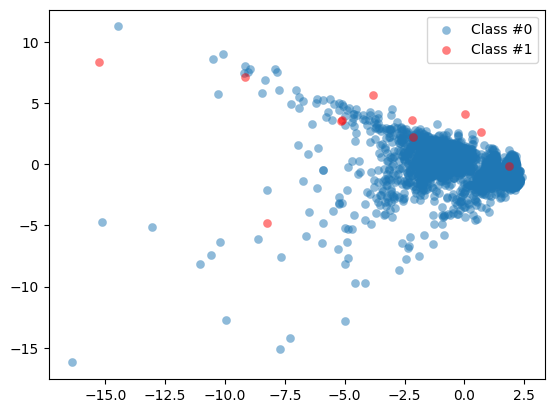

In [12]:
plt.scatter(X_train[y == 0].iloc[:, 1], X_train[y == 0].iloc[:, 2], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X_test[y == 1].iloc[:, 1], X_test[y == 1].iloc[:, 2], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.legend()

# Applying SMOTE

This dataset is imbalanced as number of fraud cases is very less as compared to non-fraud case

Imbalance dataset needs to be balanced before training the model - Imbalanced data can lead to biased models.

To balance , we will use Synthetic Minority Over-sampling Technique (SMOTE) which creates new, synthetic, samples that are quite similar to the existing observations in the minority class.

In [13]:
method=SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

# Compare SMOTE to original Data


0    5000
1      50
Name: Class, dtype: int64
0    4001
1    4001
Name: Class, dtype: int64


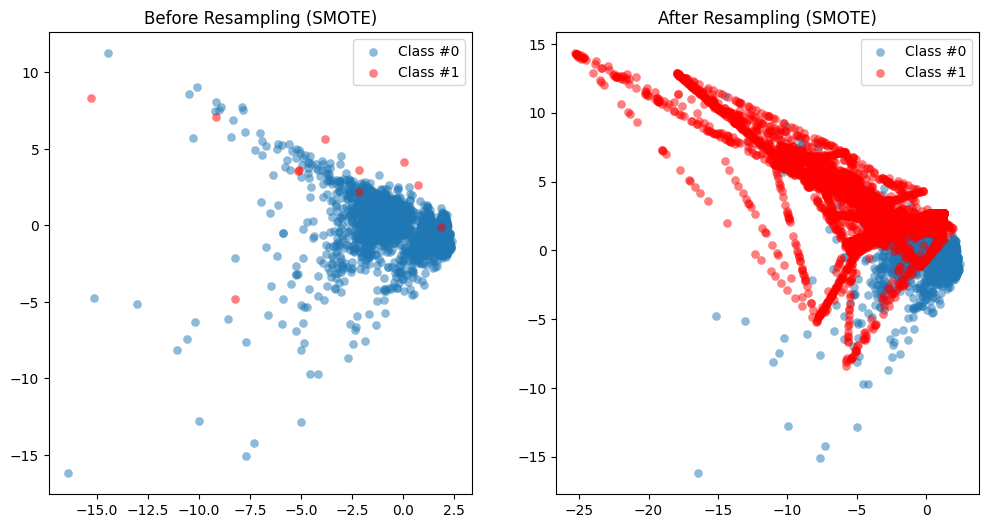

In [14]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare_plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before resampling
axes[0].scatter(X_train[y == 0].iloc[:, 1], X_train[y == 0].iloc[:, 2], label="Class #0", alpha=0.5, linewidth=0.15)
axes[0].scatter(X_test[y == 1].iloc[:, 1], X_test[y == 1].iloc[:, 2], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
axes[0].set_title("Before Resampling (" + "SMOTE" + ")")
axes[0].legend()

# After resampling
axes[1].scatter(X_resampled[y_resampled == 0].iloc[:, 1], X_resampled[y_resampled == 0].iloc[:, 2], label="Class #0", alpha=0.5, linewidth=0.15)
axes[1].scatter(X_resampled[y_resampled == 1].iloc[:, 1], X_resampled[y_resampled == 1].iloc[:, 2], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
axes[1].set_title("After Resampling (" + "SMOTE" + ")")
axes[1].legend()

plt.show()


# Logistic Regression

In [15]:
# LR prediction model
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
lr_predicted=lr_model.predict(X_test)

#performance evaluation
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test,lr_predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=lr_predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       999
           1       0.62      0.73      0.67        11

    accuracy                           0.99      1010
   macro avg       0.81      0.86      0.83      1010
weighted avg       0.99      0.99      0.99      1010

Confusion matrix:
 [[994   5]
 [  3   8]]


# RandomForest Classifier

In [16]:
# RF prediction model
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_predicted=rf_model.predict(X_test)

#performance evaluation
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test,rf_predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=rf_predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       999
           1       1.00      0.82      0.90        11

    accuracy                           1.00      1010
   macro avg       1.00      0.91      0.95      1010
weighted avg       1.00      1.00      1.00      1010

Confusion matrix:
 [[999   0]
 [  2   9]]


# NaiveBayesClassifier

In [17]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
nb_predicted=nb_model.predict(X_test)

#performance evaluation
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test,nb_predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=nb_predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       999
           1       0.58      0.64      0.61        11

    accuracy                           0.99      1010
   macro avg       0.79      0.82      0.80      1010
weighted avg       0.99      0.99      0.99      1010

Confusion matrix:
 [[994   5]
 [  4   7]]


# Hyperparameter Tuning for RandomForest

In [19]:
# Create search space
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'],  'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}

In [20]:
# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [27]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='gini',
            max_depth=8, max_features='auto',  min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)

# # Get results from your model
#performance evaluation
# Print the classifcation report and confusion matrix
# print('Classification report:\n', classification_report(y_test,model))
# conf_mat = confusion_matrix(y_true=y_test, y_pred=model)
# print('Confusion matrix:\n', conf_mat)

In [29]:
# Import the package
from sklearn.ensemble import VotingClassifier

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
            min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = GaussianNB()

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results
# print('Classification report:\n', classification_report(y_test,model))
# conf_mat = confusion_matrix(y_true=y_test, y_pred=model)
# print('Confusion matrix:\n', conf_mat)